<a href="https://colab.research.google.com/github/red31/Dicoding-ML/blob/main/Dicoding_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latihan SKLearn Decision Tree https://www.dicoding.com/academies/184/tutorials/8397

In [ ]:
# https://www.dicoding.com/academies/184/tutorials/8397
# Latihan SKLearn Decision Tree

import pandas as pd
from sklearn.datasets import load_iris
 
# Membaca file iris.csv
iris = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Iris.csv')

# menghilangkan kolom yang tidak penting
iris.drop('Id',axis=1,inplace=True)

# memisahkan atribut dan label
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]
y = iris['Species']

from sklearn.tree import DecisionTreeClassifier
 
# membuat model Decision Tree
tree_model = DecisionTreeClassifier() 
 
# melakukan pelatihan model terhadap data
tree_model.fit(X, y)

# prediksi model dengan tree_model.predict([[SepalLength, SepalWidth, PetalLength, PetalWidth]])
tree_model.predict([[6.2, 3.4, 5.4, 2.3]])

from sklearn.tree import export_graphviz
export_graphviz(
    tree_model,
    out_file = "iris_tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded= True,
    filled =True
)

import os
os.listdir

#iris.head()

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.5.0


In [ ]:
# !wget --no-check-certificate https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip -O /tmp/messy_vs_clean_room.zip


# melakukan ekstraksi pada file zip https://www.dicoding.com/academies/184/tutorials/8527

In [ ]:
import zipfile,os
local_zip = '/content/drive/MyDrive/Colab Notebooks/messy-vs-clean-room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/')
zip_ref.close()
 
base_dir = '/content/drive/MyDrive/Colab Notebooks/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')


In [ ]:
os.listdir('/content/drive/MyDrive/Colab Notebooks/images/train')

['clean', 'messy']

In [ ]:
os.listdir('/content/drive/MyDrive/Colab Notebooks/images/val')

['clean', 'messy']

In [ ]:
os.listdir('/content/drive/MyDrive/Colab Notebooks/images/test')

['0.png',
 '1.png',
 '2.png',
 '3.png',
 '4.png',
 '5.png',
 '6.png',
 '7.png',
 '8.png',
 '9.png']

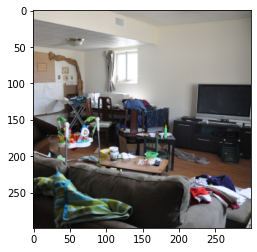

-1

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("/tmp/images/test/5.png")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()
cv2.waitKey()

In [ ]:
# membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir, 'clean')
 
# membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')
 
# membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')
 
# membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir, 'messy')

from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')


Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)



Epoch 1/20
25/25 - 7s - loss: 0.7405 - accuracy: 0.5900 - val_loss: 0.7233 - val_accuracy: 0.5000
Epoch 2/20
25/25 - 6s - loss: 0.6910 - accuracy: 0.5200 - val_loss: 0.6693 - val_accuracy: 0.5000
Epoch 3/20
25/25 - 6s - loss: 0.6405 - accuracy: 0.5800 - val_loss: 0.6299 - val_accuracy: 0.5000
Epoch 4/20
25/25 - 6s - loss: 0.6540 - accuracy: 0.7100 - val_loss: 0.5911 - val_accuracy: 0.8000
Epoch 5/20
25/25 - 6s - loss: 0.4912 - accuracy: 0.7700 - val_loss: 0.4110 - val_accuracy: 0.8000
Epoch 6/20
25/25 - 6s - loss: 0.5378 - accuracy: 0.7200 - val_loss: 0.5319 - val_accuracy: 0.7500
Epoch 7/20
25/25 - 6s - loss: 0.5490 - accuracy: 0.7500 - val_loss: 0.4590 - val_accuracy: 0.8000
Epoch 8/20
25/25 - 6s - loss: 0.5871 - accuracy: 0.6400 - val_loss: 0.6873 - val_accuracy: 0.5500
Epoch 9/20
25/25 - 6s - loss: 0.5273 - accuracy: 0.7400 - val_loss: 0.4505 - val_accuracy: 0.7500
Epoch 10/20
25/25 - 6s - loss: 0.4838 - accuracy: 0.7700 - val_loss: 0.4979 - val_accuracy: 0.8000
Epoch 11/20
25/25 -

/tmp/images/test/9.png
clean


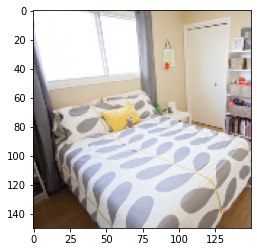

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# change it to your filename
fn = '/tmp/images/test/9.png'
 
# predicting images
path = fn
img = image.load_img(path, target_size=(150,150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
 
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
  
print(fn)
if classes==0:
  print('clean')
else:
  print('messy')
